# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from torchvision import datasets, transforms, models

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
from torchvision import datasets, transforms, models

# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Create training set and define training dataloader
## YOUR CODE HERE ##
trainset = datasets.MNIST(root='data', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# Create test set and define test dataloader
## YOUR CODE HERE ##
valset = datasets.MNIST(root='data', download=True, train=False, transform=transform)
valloader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=True)
testset = datasets.MNIST(root='data', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=True)

Print  shape and size of the datasets.

In [4]:
print("Train set:")
print("  Shape:", trainset.data.shape)
print("  Size:", trainset.data.size())

print("Validation set:")
print("  Shape:", valset.data.shape)
print("  Size:", valset.data.size())

print("Test set:")
print("  Shape:", testset.data.shape)
print("  Size:", testset.data.size())


Train set:
  Shape: torch.Size([60000, 28, 28])
  Size: torch.Size([60000, 28, 28])
Validation set:
  Shape: torch.Size([10000, 28, 28])
  Size: torch.Size([10000, 28, 28])
Test set:
  Shape: torch.Size([10000, 28, 28])
  Size: torch.Size([10000, 28, 28])


Print Shape and size of loader

In [5]:

print("Train set:")
for images, labels in trainloader:
    print("  Batch shape:", images.shape)
    print("  Batch size:", images.size(0))
    break  # Print only the first batch

print("\nValidation set:")
for images, labels in valloader:
    print("  Batch shape:", images.shape)
    print("  Batch size:", images.size(0))
    break

print("\nTest set:")
for images, labels in testloader:
    print("  Batch shape:", images.shape)
    print("  Batch size:", images.size(0))
    break

Train set:
  Batch shape: torch.Size([64, 1, 28, 28])
  Batch size: 64

Validation set:
  Batch shape: torch.Size([32, 1, 28, 28])
  Batch size: 32

Test set:
  Batch shape: torch.Size([32, 1, 28, 28])
  Batch size: 32


## Justify your preprocessing

### In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

##### Answer:
I chose the transforms I used in order to standardize the MNIST images and ensure they have the same dimensions and properties. The "transforms.ToTensor()" function converts the image into a numerical representation that can be processed by the system. This transformation is essential to work with the image data effectively.

Additionally, I applied the "transforms.Normalize()" function to normalize the tensor. By specifying the mean and standard deviation as parameters, this transformation scales the values of the tensor to a standard range. Normalization helps in achieving better model performance by reducing the impact of varying pixel intensities across different images.

By applying these transformations, I aimed to preprocess the MNIST dataset in a way that optimizes the compatibility and quality of the input data for the subsequent steps of my workflow.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

6


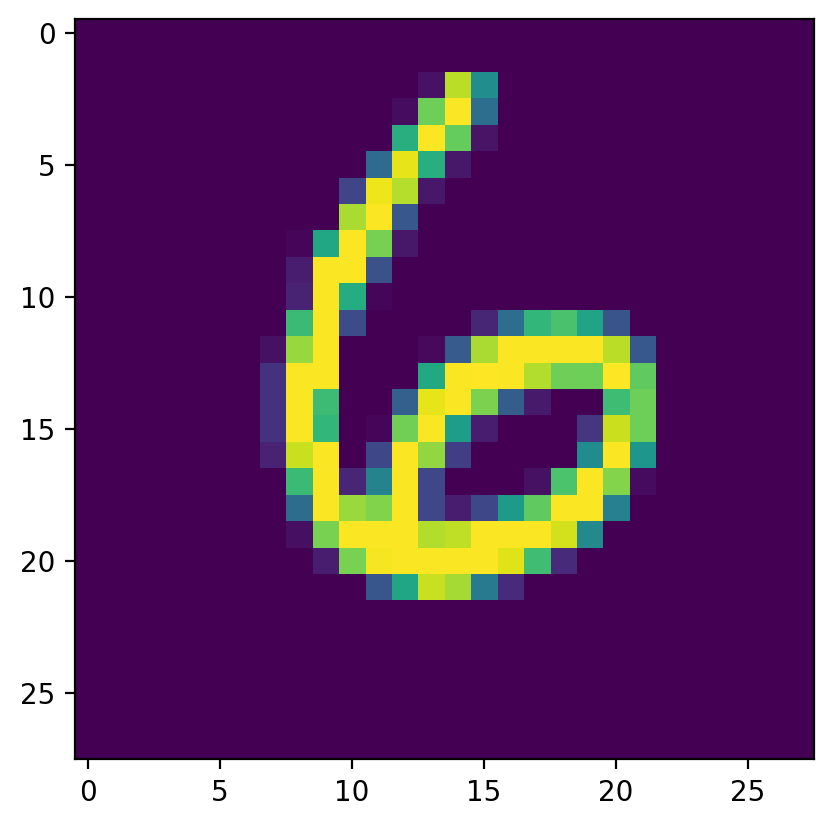

7


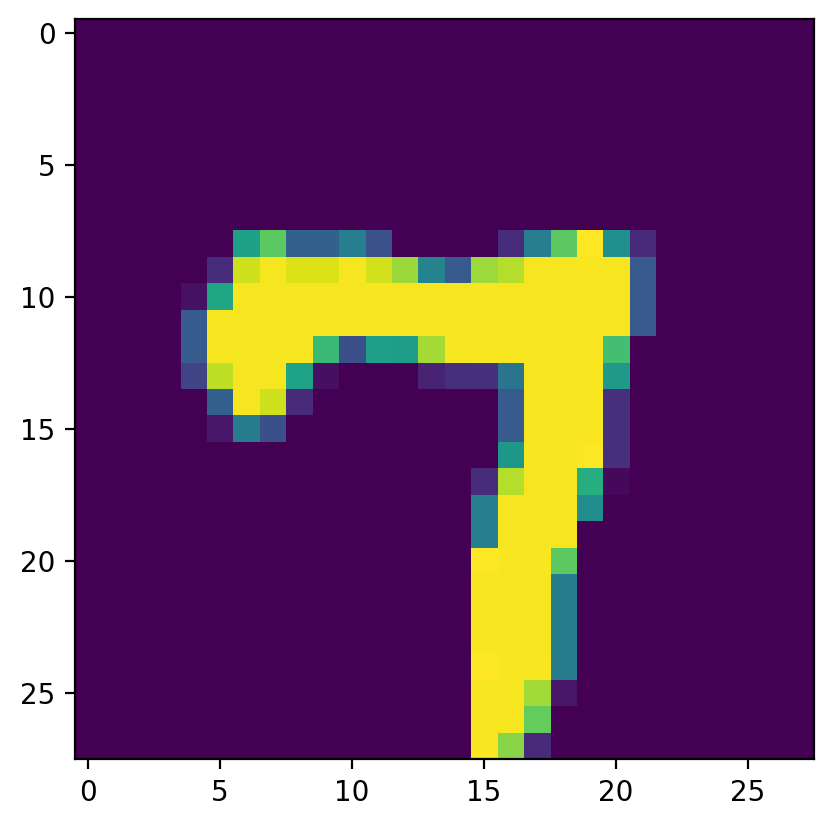

2


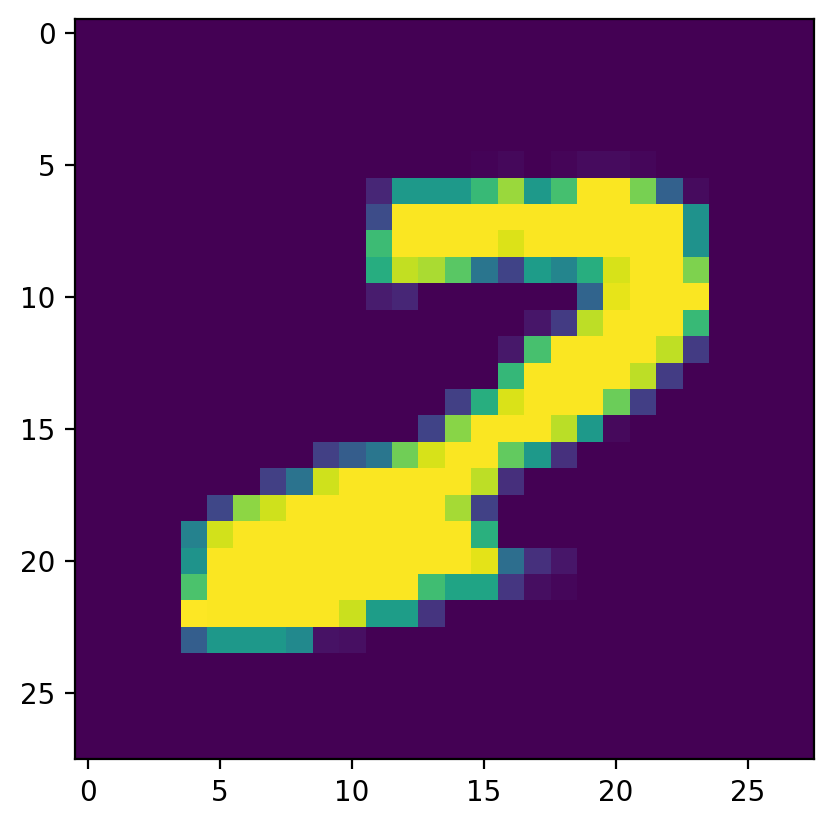

7


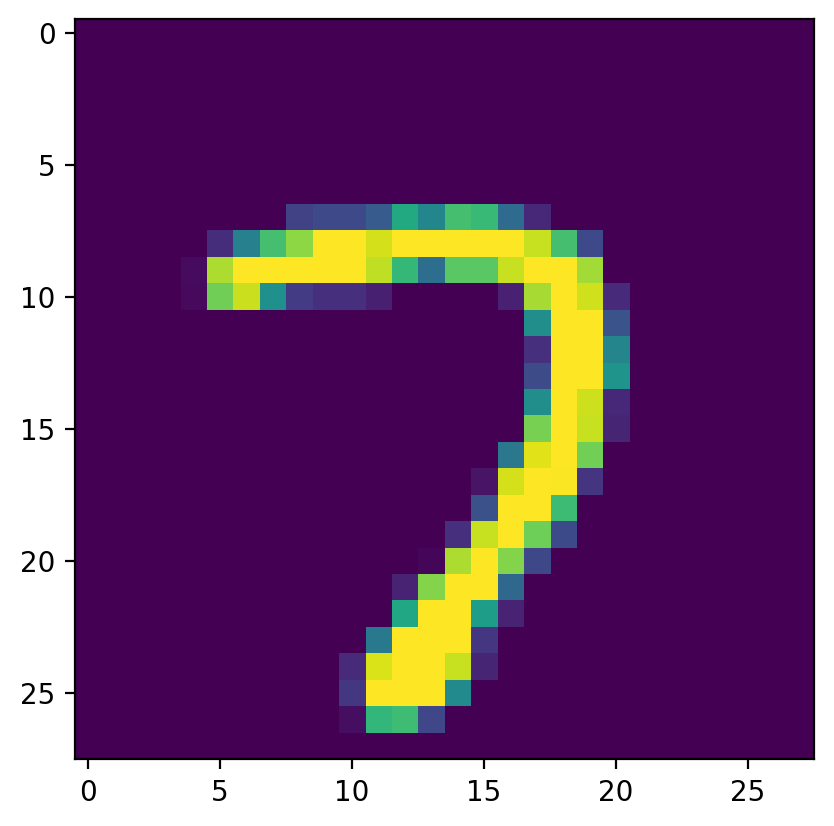

3


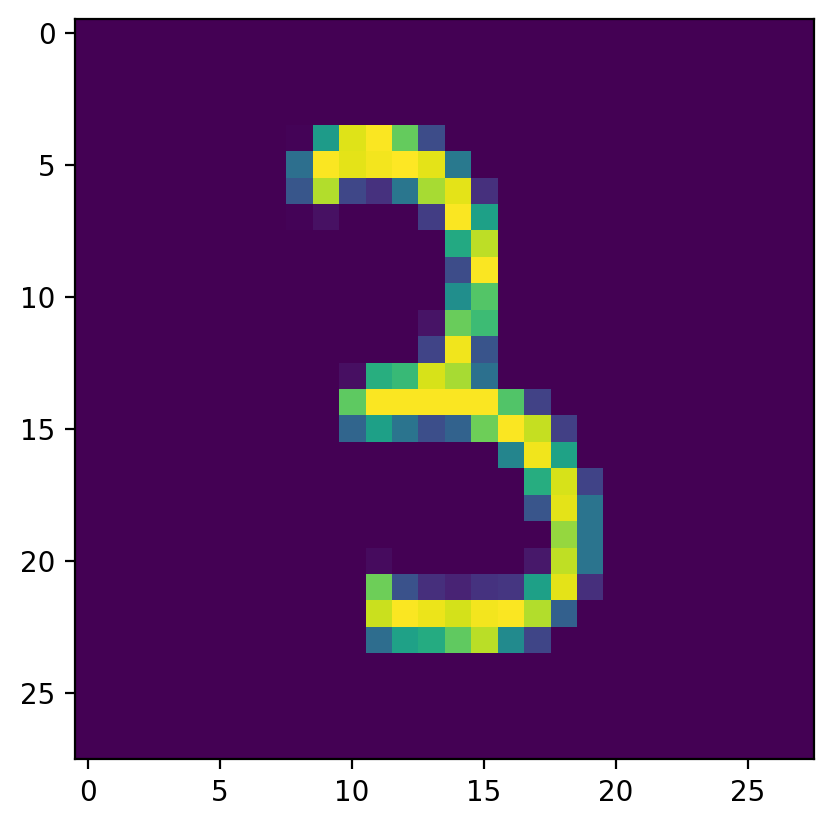

In [7]:
# Explore data
## YOUR CODE HERE ##
show5(trainloader)

In [8]:
import torch.nn as nn
import torch.nn.functional as F

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [9]:
## YOUR CODE HERE ##
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [10]:
## YOUR CODE HERE ##
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [11]:
import math
batch_size = 64
steps = math.ceil(len(trainset) / batch_size)

print("Number of steps in one Epoch:", steps)


Number of steps in one Epoch: 938


In [12]:
## YOUR CODE HERE ##
import time
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.cuda()
time0 = time.time()
epochs = 15
train_losses, test_losses = [], []
running_loss = 0
steps = 0
print_every = 469

for e in range(epochs):
    running_loss = 0
    model.train()  # Set the model to training mode
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        steps += 1
        # print("step : ",steps)
        #evaluation of model
        if steps % print_every == 0:
            model.eval()  # Set the model to evaluation mode
            with torch.no_grad():
                test_loss = 0
                accuracy = 0
                for inputs, labels in valloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    inputs = inputs.view(inputs.shape[0], -1)

                    logps = model(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()

                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

                train_losses.append(running_loss/print_every)
                test_losses.append(test_loss/len(valloader))

                print(f"Epoch {e+1}/{epochs}.. "
                      f"Train loss: {running_loss/print_every:.3f}.. "
                      f"Validation loss: {test_loss/len(valloader):.3f}.. "
                      f"Validation accuracy: {accuracy/len(valloader):.3f}")

            running_loss = 0
            model.train()  # Set the model back to training mode

print("\nTraining Time (in minutes) =", (time.time()-time0)/60)


cuda:0
Epoch 1/15.. Train loss: 0.978.. Validation loss: 0.394.. Validation accuracy: 0.890
Epoch 1/15.. Train loss: 0.364.. Validation loss: 0.308.. Validation accuracy: 0.910
Epoch 2/15.. Train loss: 0.309.. Validation loss: 0.268.. Validation accuracy: 0.922
Epoch 2/15.. Train loss: 0.276.. Validation loss: 0.252.. Validation accuracy: 0.923
Epoch 3/15.. Train loss: 0.246.. Validation loss: 0.227.. Validation accuracy: 0.932
Epoch 3/15.. Train loss: 0.219.. Validation loss: 0.199.. Validation accuracy: 0.945
Epoch 4/15.. Train loss: 0.196.. Validation loss: 0.180.. Validation accuracy: 0.948
Epoch 4/15.. Train loss: 0.181.. Validation loss: 0.169.. Validation accuracy: 0.948
Epoch 5/15.. Train loss: 0.169.. Validation loss: 0.168.. Validation accuracy: 0.951
Epoch 5/15.. Train loss: 0.148.. Validation loss: 0.148.. Validation accuracy: 0.956
Epoch 6/15.. Train loss: 0.138.. Validation loss: 0.138.. Validation accuracy: 0.959
Epoch 6/15.. Train loss: 0.134.. Validation loss: 0.150.. 

Plot the training loss (and validation loss/accuracy, if recorded).

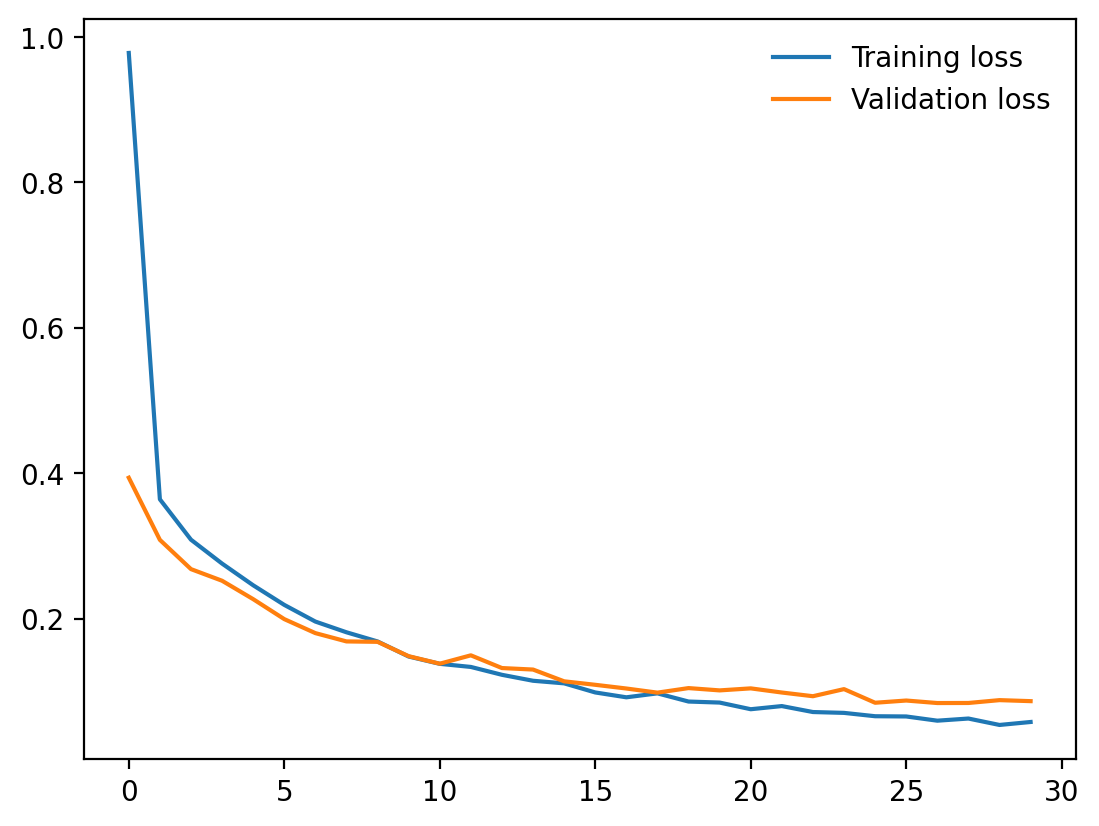

In [13]:
## YOUR CODE HERE ##
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
def view_classify(img, ps):
    ''' Function for viewing an image and its predicted classes. '''
    ps = ps.cpu().data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6, 9), ncols=2)
    ax1.imshow(img.reshape(1, 28, 28).cpu().numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()


In [15]:
## YOUR CODE HERE ##
def Predict_Image(model_name):
  images, labels = next(iter(testloader))
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(device)
  model_name.cuda()
  images, labels = images.to(device), labels.to(device)
  img = images[0].view(1, 784)
  with torch.no_grad():
      logps = model_name(img)

  ps = torch.exp(logps)
  probab = list(ps.cpu().numpy()[0])
  print("Predicted Digit =", probab.index(max(probab)))
  view_classify(img.view(1, 28, 28), ps)



cuda:0
Predicted Digit = 1


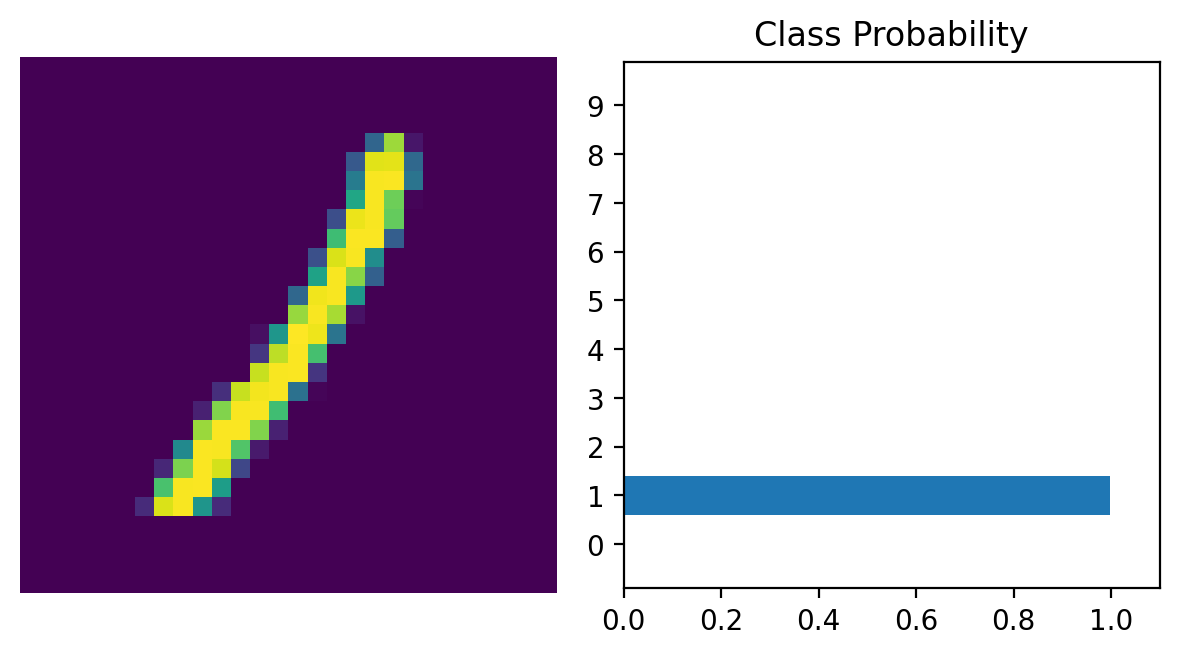

In [16]:
Predict_Image(model)

In [17]:
def get_accuracy_of(model_name):
  correct_count, all_count = 0, 0
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  print(device)
  model_name.cuda()
  for images,labels in testloader:
    images, labels = images.to(device), labels.to(device)
    for i in range(len(labels)):
      img = images[i].view(1, 784)
      with torch.no_grad():
          logps = model_name(img)


      ps = torch.exp(logps)
      probab = list(ps.cpu().numpy()[0])
      pred_label = probab.index(max(probab))
      true_label = labels.cpu().numpy()[i]
      if(true_label == pred_label):
        correct_count += 1
      all_count += 1

  print("Number Of Images Tested =", all_count)
  print("\nmodel_name Accuracy =", (correct_count/all_count))
  print("\nmodel_name Accuracy in Percentage =", (correct_count/all_count)*100)


In [18]:
get_accuracy_of(model)

cuda:0
Number Of Images Tested = 10000

model_name Accuracy = 0.9715

model_name Accuracy in Percentage = 97.15


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [19]:
## YOUR CODE HERE ##
'''
The initial model achieved 97% accuracy, but I will try to improve it by tweaking the hyperparameters.
I will experiment with different batch sizes, number of hidden layers, epochs, optimizers, and learning rates.
previously i also try using sigmoid  activation functions,
but I will revert back to ReLU because sigmoid functions tend to saturate for extreme input values.

Here is a more detailed explanation of the changes I will make:

1. Batch size: I will experiment with different batch sizes to see how they affect the model accuracy.
               A larger batch size can help the model converge faster, but it can also lead to overfitting.
               i will increase batch size from  64 to 128.

2. Number of hidden layers: I will try adding more hidden layers or increasing the number of units in each layer.
                            This can help the model learn more complex patterns in the data.

3. Epochs: I will increase the number of epochs to train the model for longer.
           This can help the model learn more about the data and improve its accuracy.

4. Optimizer and learning rate: I will try using a different optimizer with a larger learning rate.
                                This can help the model converge faster.
                                i increase learning rate from 0.001 to 0.009

I will train the model with the modified hyperparameters and evaluate the model accuracy on the test set.
I will then compare the results to the initial model accuracy to see
if the modifications have improved the model performance.
'''

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
model_2 = nn.Sequential(nn.Linear(input_size,256),
                     nn.ReLU(),
                      nn.Linear(256, hidden_sizes[0]),
                     nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

In [20]:
print("Model 1 :",model)
print("Model 2 :",model_2)

Model 1 : Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
Model 2 : Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [21]:
# Loss function and gradient descent
optimizer = optim.SGD(model_2.parameters(), lr=0.009, momentum=0.9)
criterion = nn.NLLLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.003)


In [22]:
## YOUR CODE HERE ##
import time
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model_2.cuda()
time0 = time.time()
epochs = 40
train_losses, test_losses = [], []
running_loss = 0
steps = 0
print_every = 469

for e in range(epochs):
    running_loss = 0
    model_2.train()  # Set the model_2 to training mode
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model_2(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        steps += 1
        # print("step : ",steps)
        if steps % print_every == 0:
            model_2.eval()  # Set the model_2 to evaluation mode
            with torch.no_grad():
                test_loss = 0
                accuracy = 0
                for inputs, labels in valloader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    inputs = inputs.view(inputs.shape[0], -1)

                    logps = model_2(inputs)
                    batch_loss = criterion(logps, labels)
                    test_loss += batch_loss.item()

                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

                train_losses.append(running_loss/print_every)
                test_losses.append(test_loss/len(valloader))

                print(f"Epoch {e+1}/{epochs}.. "
                      f"Train loss: {running_loss/print_every:.3f}.. "
                      f"Validation loss: {test_loss/len(valloader):.3f}.. "
                      f"Validation accuracy: {accuracy/len(valloader):.3f}")

            running_loss = 0
            model_2.train()  # Set the model_2 back to training mode

print("\nTraining Time for Model_2 (in minutes) =", (time.time()-time0)/60)


cuda:0
Epoch 1/40.. Train loss: 0.717.. Validation loss: 0.274.. Validation accuracy: 0.919
Epoch 2/40.. Train loss: 0.243.. Validation loss: 0.185.. Validation accuracy: 0.944
Epoch 3/40.. Train loss: 0.166.. Validation loss: 0.144.. Validation accuracy: 0.956
Epoch 4/40.. Train loss: 0.131.. Validation loss: 0.116.. Validation accuracy: 0.965
Epoch 5/40.. Train loss: 0.104.. Validation loss: 0.115.. Validation accuracy: 0.964
Epoch 6/40.. Train loss: 0.089.. Validation loss: 0.100.. Validation accuracy: 0.969
Epoch 7/40.. Train loss: 0.073.. Validation loss: 0.095.. Validation accuracy: 0.971
Epoch 8/40.. Train loss: 0.065.. Validation loss: 0.086.. Validation accuracy: 0.973
Epoch 9/40.. Train loss: 0.058.. Validation loss: 0.092.. Validation accuracy: 0.971
Epoch 10/40.. Train loss: 0.053.. Validation loss: 0.074.. Validation accuracy: 0.975
Epoch 11/40.. Train loss: 0.044.. Validation loss: 0.079.. Validation accuracy: 0.975
Epoch 12/40.. Train loss: 0.040.. Validation loss: 0.076

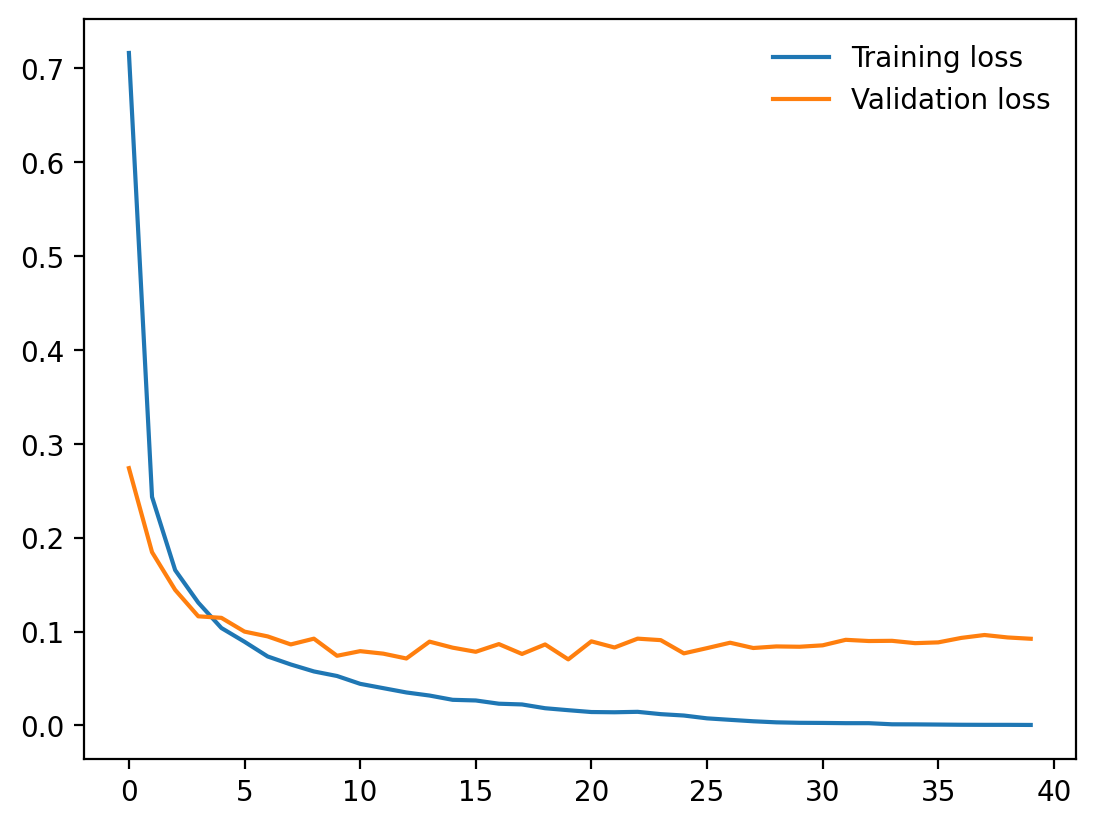

In [23]:
## YOUR CODE HERE ##
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

cuda:0
Predicted Digit = 3


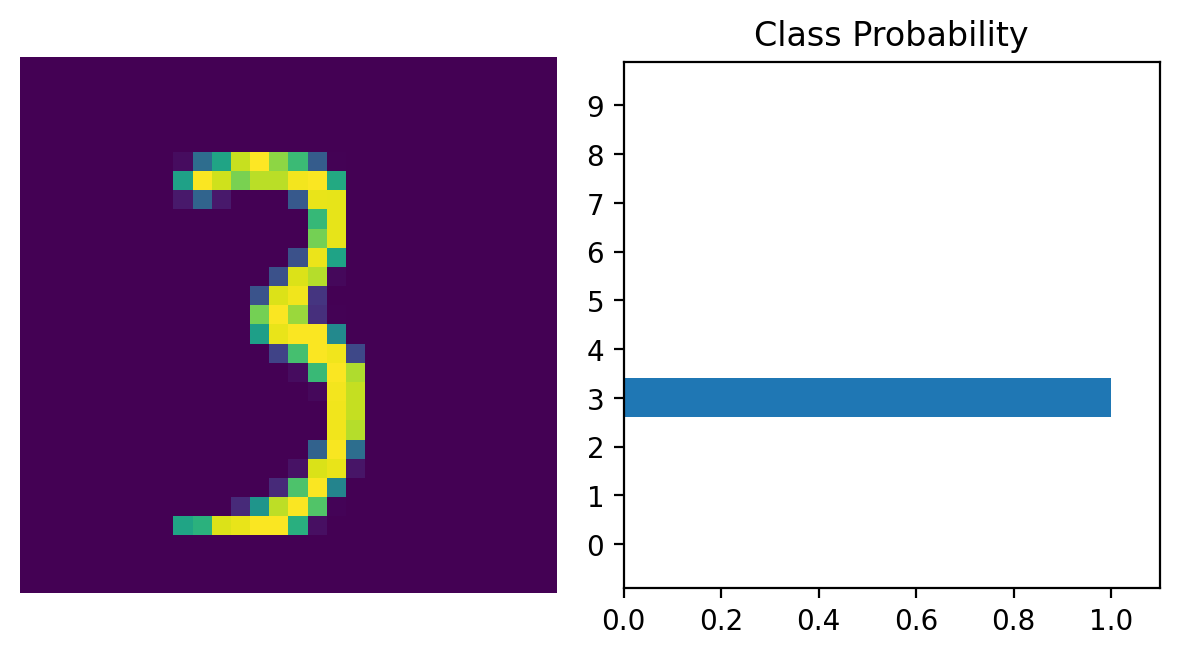

In [24]:
## YOUR CODE HERE ##
#testing model on test image
Predict_Image(model_2)


In [25]:
# Model_2 accuracy
get_accuracy_of(model_2)

cuda:0
Number Of Images Tested = 10000

model_name Accuracy = 0.9816

model_name Accuracy in Percentage = 98.16


## Conclusion
The initial model achieved an accuracy of 97.15%. After tweaking the hyperparameters, the second model achieved an accuracy of 98.16%. This means that the second model is slightly more accurate than the initial model. However, the difference in accuracy is not significant, so I will be using the initial model as it is more straightforward and easier to interpret.

Here are some of the hyperparameters that were tweaked:

- Batch size: The batch size was increased from 64 to 128.
- Learning rate: The learning rate was increased from 0.001 to 0.009.
- Epochs: The number of epochs was increased from 15 to 40.
- Hidden layers: The number of hidden layers was increased from 2 to 3.


I will continue to experiment with different hyperparameters and training parameters to see if I can improve the accuracy of the initial model. However, for now, I will be using the initial model as it has the highest accuracy.



## Saving your model
Using `torch.save`, save your model for future loading.

In [26]:
## YOUR CODE HERE ##
torch.save(model, './my_mnist_model.pt')
